In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [32]:
data = pd.read_csv('Processed_data.csv',index_col=0)

In [33]:
data

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,...,inr_min,inr_max,pt_min,pt_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,weight_admit
0,39307659,0,0,78.194169,10,72.0,134.0,97.263158,97.0,127.0,...,1.900000,2.30000,20.00000,24.700000,15.0,6.0,5.0,4.0,0.0,82.0
1,38743306,1,0,65.602396,0,60.0,97.0,84.166667,95.0,143.0,...,1.100000,1.10000,12.10000,12.100000,15.0,6.0,5.0,4.0,0.0,62.1
2,32339865,1,0,64.906629,1,59.0,87.0,71.461538,113.0,150.0,...,1.200000,1.20000,12.80000,12.800000,15.0,1.0,0.0,1.0,1.0,113.1
3,39493447,0,1,45.197789,2,54.0,73.0,63.000000,122.0,142.0,...,1.000000,1.00000,10.50000,10.500000,15.0,6.0,5.0,4.0,0.0,93.8
4,38941409,0,0,44.317598,6,60.0,80.0,65.142857,99.0,144.0,...,1.000000,1.00000,10.60000,10.600000,15.0,6.0,5.0,4.0,0.0,54.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33885,37061810,1,1,71.189233,0,57.0,77.0,65.545455,79.0,122.0,...,1.200000,1.20000,12.60000,12.600000,15.0,6.0,5.0,4.0,0.0,124.0
33886,33431859,0,1,66.174854,0,46.0,104.0,84.652174,99.0,162.0,...,1.100000,1.10000,12.30000,12.300000,13.0,6.0,3.0,4.0,0.0,107.7
33887,38881410,1,0,57.033913,0,94.0,112.0,102.040000,89.0,108.0,...,1.305189,1.52364,14.33761,16.586131,15.0,6.0,0.0,2.0,1.0,44.2
33888,31061555,0,0,55.399450,0,68.0,162.0,91.666667,83.0,132.0,...,0.900000,0.90000,9.60000,10.000000,3.0,1.0,1.0,1.0,0.0,80.0


In [34]:
X_raw = data.iloc[:,2:]
y_df = data.iloc[:,1]
X_df = X_raw[['sbp_min', 'potassium_max.1', 'bun_min']]
Xy = pd.concat([X_df,y_df],axis=1)
Xy['label'] = np.where(Xy['aki'].to_numpy()==0,'negative','positive')
Xy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33890 entries, 0 to 33889
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sbp_min          33890 non-null  float64
 1   potassium_max.1  33890 non-null  float64
 2   bun_min          33890 non-null  float64
 3   aki              33890 non-null  int64  
 4   label            33890 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [35]:
fig = px.scatter_3d(
    Xy,
    z='sbp_min',
    y='potassium_max.1',
    x='bun_min',
    color='label'
)

fig.update_traces(
    marker={'size':2.5}
)

surface_z = [[0.052,0.052],[0.052,0.052]]
surface_y = [0.1,2.7]
surface_x = [0,0.29]

fig.add_trace(
    go.Surface(
        x=surface_x,
        y=surface_y,
        z=surface_z,
        opacity=0.5,
        showscale=False,
        colorscale='greys',
        name='separating hyperplane',
        showlegend=True,
        visible='legendonly'
    )
)

fig

In [36]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_df,y_df,test_size=0.2,random_state=10,
    stratify=y_df, shuffle=True
)

In [37]:
TreeModel = DTC(criterion='entropy',max_depth=1,random_state=15)
TreeModel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=15)

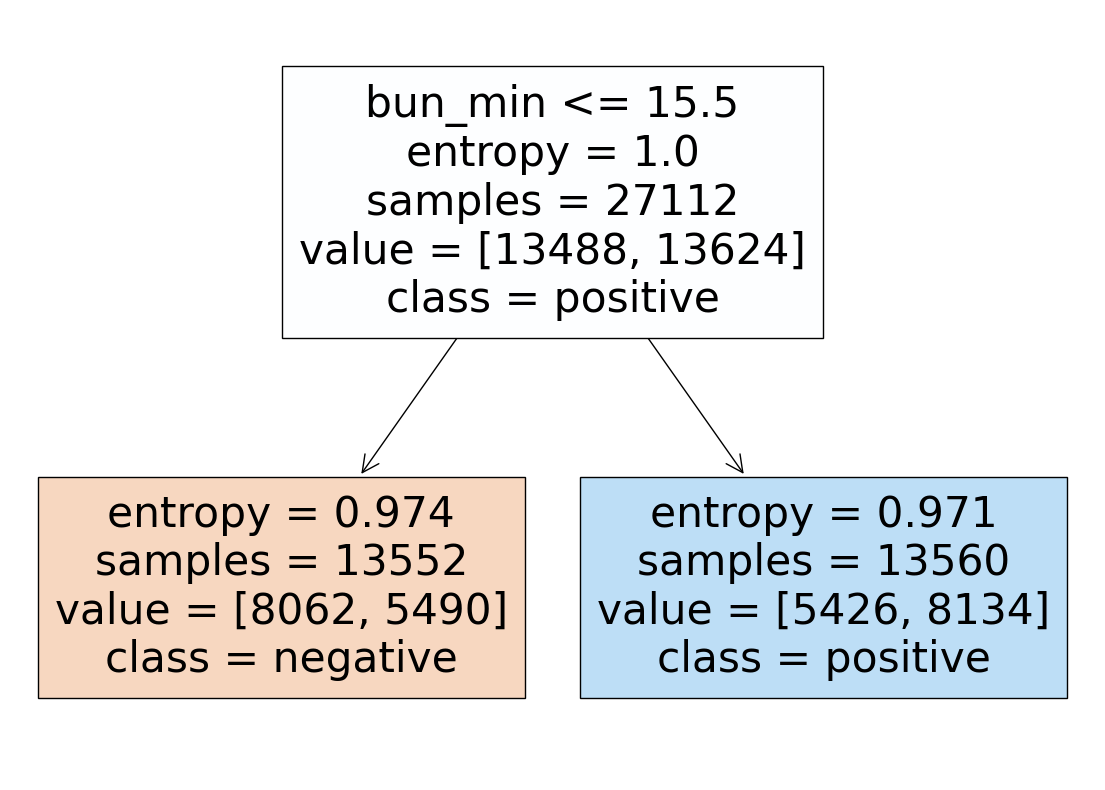

In [38]:
# Splitting rules can be visualized by using plot_tree in sklearn
plt.figure(figsize=(14,10))
plot_tree(
    TreeModel,
    filled=True,
    feature_names=['sbp_min', 'potassium_max.1', 'bun_min'],
    class_names=['negative','positive']
)
plt.show()

In [39]:
parameters = {'max_depth':np.arange(start=1,stop=10,step=1)}
parameters

{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}

In [40]:
stratifiedCV = StratifiedKFold(n_splits=8)
TreeModel = DTC(criterion='entropy')
BestTree = GridSearchCV(
    TreeModel,
    param_grid=parameters,
    scoring='f1',
    cv=stratifiedCV
)
BestTree.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=8, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1')

In [41]:
BestTree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [42]:
BestTree.best_score_

0.6161100473454819

In [43]:
y_pred = BestTree.predict(X_test)
print('F1 score on test set: {:.4f}'.format(f1_score(y_test,y_pred)))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on test set: {:.4f}'.format(accuracy))
pd.crosstab(y_test,y_pred)

F1 score on test set: 0.6136
Accuracy on test set: 0.6331


col_0,0,1
aki,,
0,2316,1056
1,1431,1975


XGBoost

In [44]:
from xgboost import XGBClassifier as XGBC

In [45]:
parameters = {
    'n_estimators':np.arange(start=2,stop=20,step=2),
    'max_depth':np.arange(start=2,stop=6,step=1),
    'learning_rate':np.arange(start=0.05,stop=0.4,step=0.05)
}

parameters

{'n_estimators': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 'max_depth': array([2, 3, 4, 5]),
 'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35])}

In [46]:
stratifiedCV = StratifiedKFold(n_splits=8)
XGBoostModel = XGBC()
BestXGBoost = GridSearchCV(
    XGBoostModel,
    param_grid=parameters,
    scoring='f1',
    cv=stratifiedCV,
    verbose=1,
    n_jobs=-1 # use all cpu cores to speedup grid search
)
BestXGBoost.fit(X_train,y_train)

Fitting 8 folds for each of 252 candidates, totalling 2016 fits


GridSearchCV(cv=StratifiedKFold(n_splits=8, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
                         'max_depth': array([2, 3, 4, 5]),
                         'n_estimators': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
             scoring='f1', verbose=1)

In [47]:
BestXGBoost.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 2}

In [48]:
BestXGBoost.best_score_

0.6487744153756467

In [49]:
y_pred = BestXGBoost.predict(X_test)
print('F1 score on test set: {:.4f}'.format(f1_score(y_test,y_pred)))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on test set: {:.4f}'.format(accuracy))
pd.crosstab(y_test,y_pred)

F1 score on test set: 0.6662
Accuracy on test set: 0.6008


col_0,0,1
aki,,
0,1372,2000
1,706,2700


Linear SVM

In [50]:
from sklearn.svm import SVC

In [51]:
# 'C': strength of L2 regularization on linear SVM. Larger 'C' --> smaller regularization.
parameters = {
    'C':np.arange(start=1,stop=20,step=5)
}
stratifiedCV = StratifiedKFold(n_splits=8)
SVCModel = SVC(kernel='linear')
BestSVC = GridSearchCV(
    SVCModel,
    param_grid=parameters,
    scoring='f1',
    cv=stratifiedCV,
    verbose=1,
    n_jobs=-1
)
BestSVC.fit(X_train,y_train)

Fitting 8 folds for each of 4 candidates, totalling 32 fits


GridSearchCV(cv=StratifiedKFold(n_splits=8, random_state=None, shuffle=False),
             estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([ 1,  6, 11, 16])}, scoring='f1',
             verbose=1)

In [52]:
BestSVC.best_estimator_

SVC(C=6, kernel='linear')

In [53]:
y_pred = BestSVC.predict(X_test)
print('F1 score on test set: {:.4f}'.format(f1_score(y_test,y_pred)))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on test set: {:.4f}'.format(accuracy))
pd.crosstab(y_test,y_pred)

F1 score on test set: 0.6514
Accuracy on test set: 0.6222


col_0,0,1
aki,,
0,1824,1548
1,1013,2393


In [54]:
Xy_test = pd.concat([X_test,y_test],axis=1)
Xy_test['label'] = Xy_test['aki'].astype(str)

In [55]:
nonlinear_models = {
    'DecisionTree':DTC(criterion='entropy'),
    'XGBoost':XGBC(),
    'SVM_rbf':SVC(kernel='rbf')
}

stratifiedCV = StratifiedKFold(n_splits=8)


params = {
    'DecisionTree':{
        'max_depth':np.arange(start=1,stop=10)
    },
    'XGBoost':{
        'n_estimators':np.arange(start=2,stop=20,step=2),
        'max_depth':np.arange(start=2,stop=6),
        'learning_rate':np.arange(start=0.05,stop=0.4,step=0.05)
    },
    'SVM_rbf':{
        'C':np.arange(0.5,5,step=0.5)
    }
}

records = {}

for model in nonlinear_models:
    BestParams = GridSearchCV(
        nonlinear_models[model],
        param_grid = params[model],
        scoring='f1',
        cv=stratifiedCV,
        n_jobs=-1
    )
    BestParams.fit(X_train,y_train)
    Xy_test[model] = BestParams.predict(X_test).astype(str)
    records[model] = BestParams
    print('For {} cross validation F1 score is {:.4f}'.format(model,BestParams.best_score_))

For DecisionTree cross validation F1 score is 0.6161
For XGBoost cross validation F1 score is 0.6488
For SVM_rbf cross validation F1 score is 0.6070
